# <center>Breast Cancer Classification

<hr>

### Import Indepencies

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf

C:\Users\endah\anaconda3\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\endah\anaconda3\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\endah\anaconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Mengecek apakah tensorflow bisa mengakses GPU kita
print(tf.config.list_physical_devices('GPU'))

[]


In [3]:
# Mengecek versi tensorflow yang digunakan
tf.__version__

'2.12.0'

In [4]:
# Mengimpor library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import (confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, 
                             recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay)
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout


### Data Collection

In [5]:
# Load data
pd.set_option('display.max_columns', None)
df1 = pd.read_csv('data.csv')
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df=df1.copy()
df=df1.rename(columns={"concave points_mean":"concave_points_mean","concave points_se":"concave_points_se","concave points_worst":"concave_points_worst"})

In [7]:
df.drop(columns=['Unnamed: 32','id'],axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.shape

(569, 31)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
# Mengecek missing values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [12]:
# Encoding label diagnosis
labels = LabelEncoder().fit_transform(df['diagnosis'])
df['target'] = labels
df.drop(columns='diagnosis',axis=1,inplace=True)

In [13]:
# Melihat target
df['target'].value_counts()

target
0    357
1    212
Name: count, dtype: int64

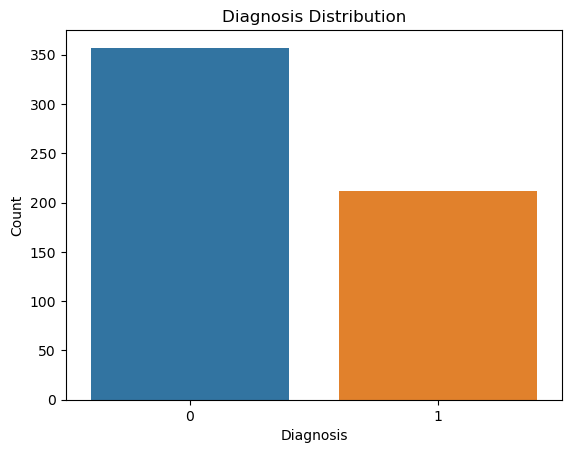

In [14]:
# Plotting with Seaborn
sns.countplot(data=df, x='target')

# Customize plot
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Show plot
plt.show()

In [15]:
# Untuk reproducibility
from numpy.random import seed
seed(100)

In [16]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [17]:
df.groupby('target').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [18]:
# Membagi kolom menjadi kolom numerik dan kategori
var_kategori = [var for var in df.columns if df[var].dtype=='O' and var!='target']
var_numerik = [var for var in df.columns if df[var].dtype!='O' and var!='target']

# Melihat variabel yang sudah dipisah
print(var_kategori)
print(var_numerik)

[]
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']


<div class="alert alert-block alert-info" style="font-size: 14px; font-family: verdana; background-color: #FFEBCD; color: #8B4513; border-color: #D2691E;">
    <span style="color: #8B4513; font-weight: bold;">📌 Observasi:</span>
    <br>
     - Kolom yang akan dihapus: 'id' dan 'Unnamed: 32'
     <br>
     - Variabel kategori: 'diagnosis'
     <br>
     - Label: 'target' dikodekan oleh label 'diagnosis'
     <br>
     - Missing values: Tidak ada
     <br>
     - Variabel numerik: Semua kolom
</div>

### Data Preprocessing

**Correlation Variables**

In [19]:
# separate features and target variable
X = df.drop(columns=['target'])
y = df['target']

In [20]:
# creating mask
mask = np.triu(np.ones_like(X.corr()))

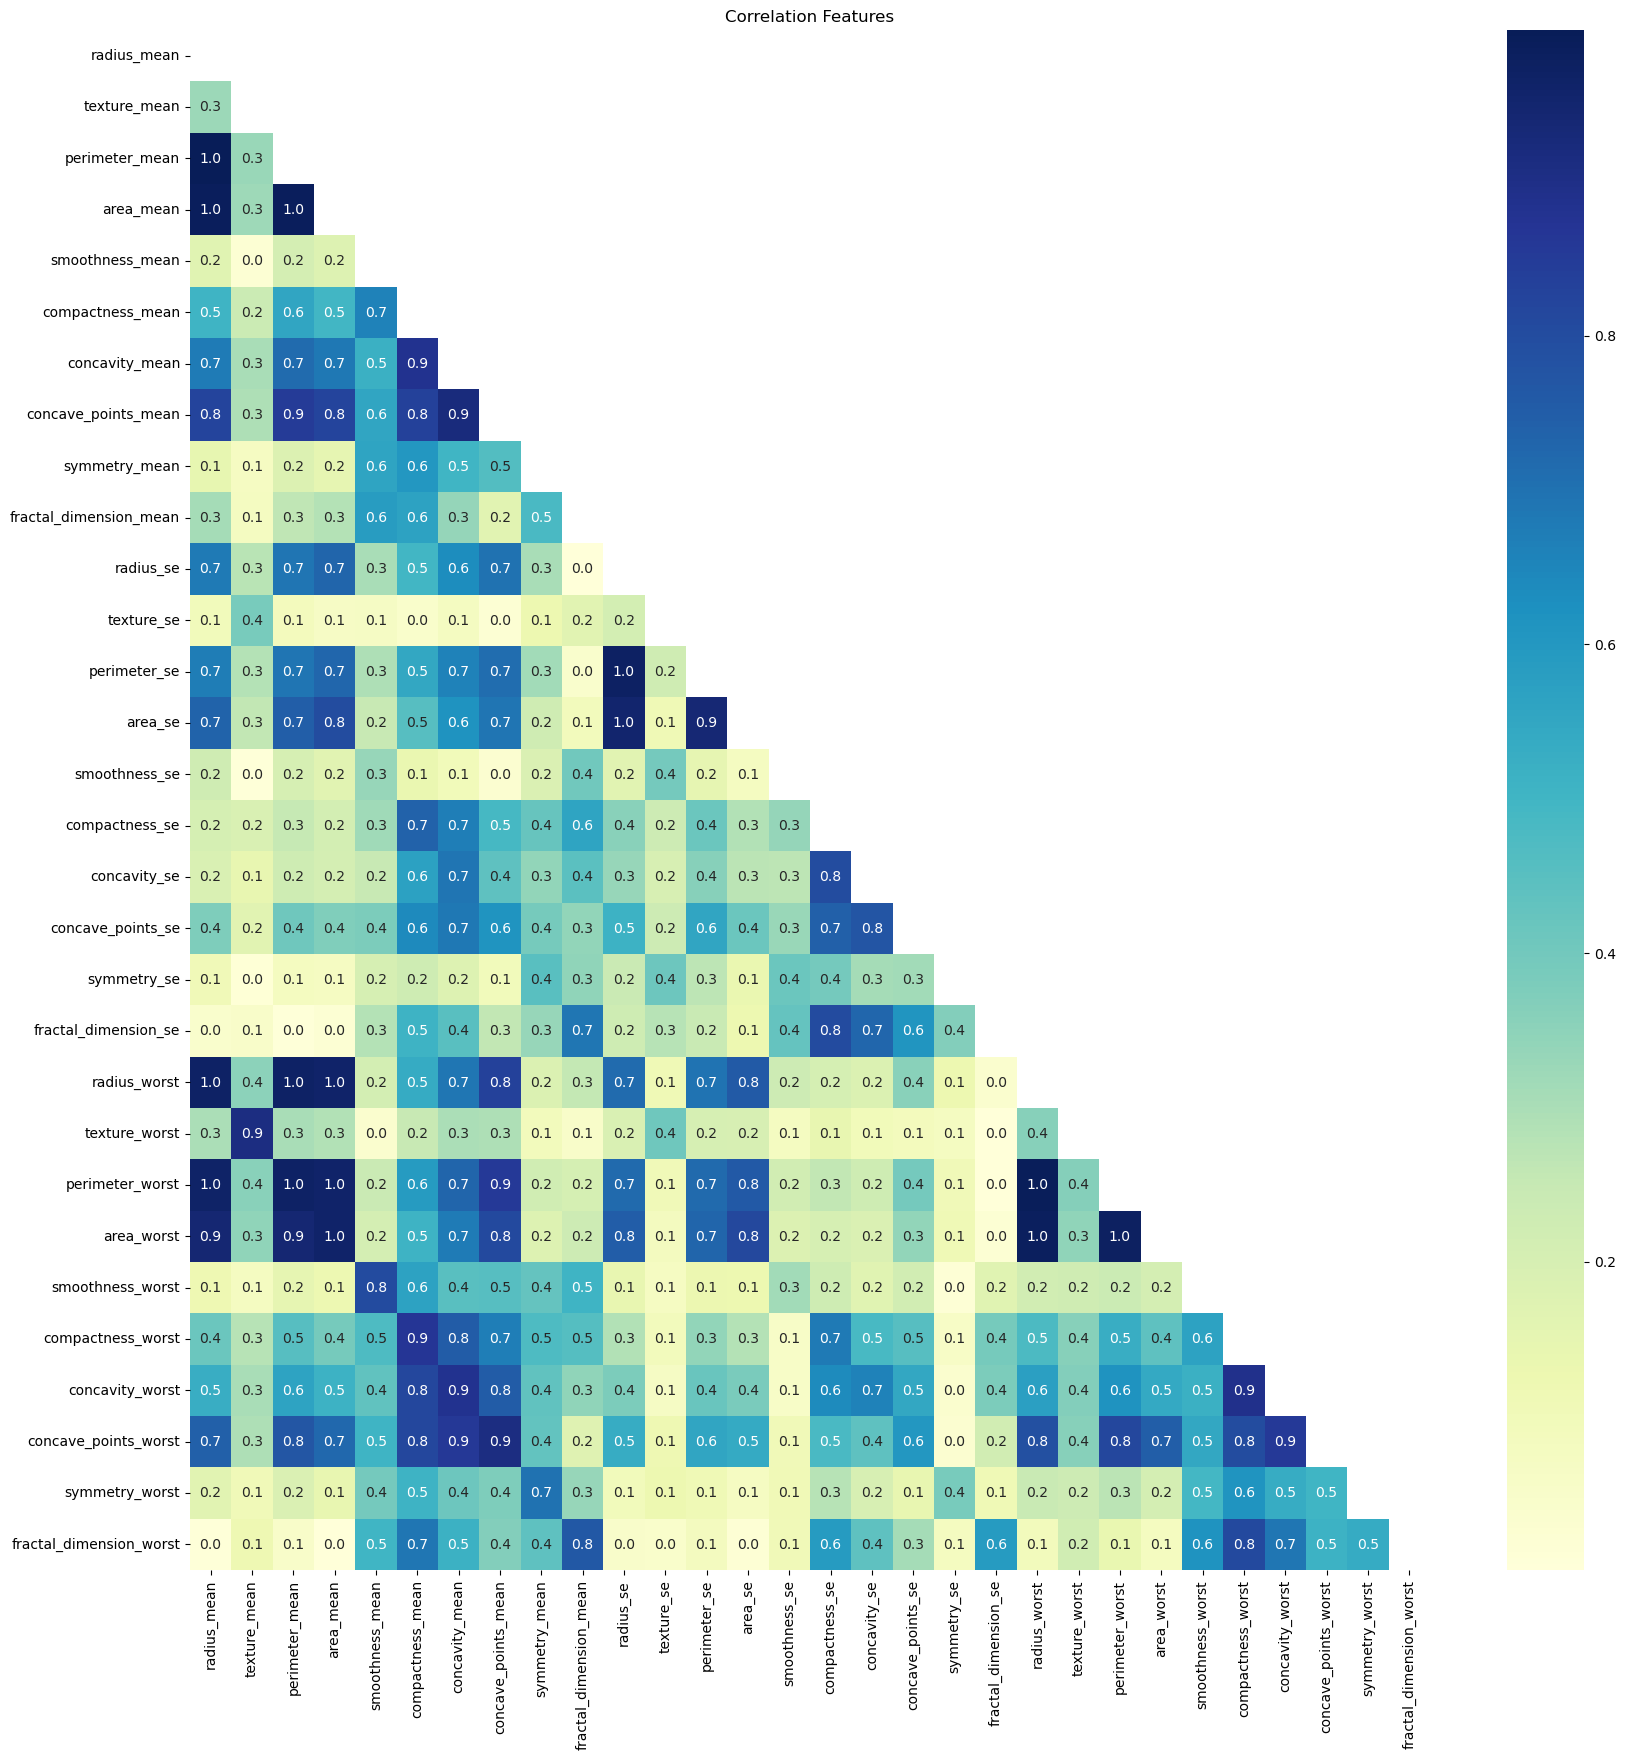

In [21]:
# plotting a triangle correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(X.corr().abs(), cmap="YlGnBu", annot=True, fmt='.1f', mask=mask)

# displaying heatmap
plt.title('Correlation Features')
plt.show()

<div class="alert alert-block alert-info" style="font-size: 14px; font-family: verdana; background-color: #FFEBCD; color: #8B4513; border-color: #D2691E;">
    <span style="color: #8B4513; font-weight: bold;">📌 Observasi:</span>
    <br>
    - Ada beberapa variabel yang saling berkorelasi yang diidentifikasi dalam kumpulan data yang harus dipertimbangkan untuk dihapus guna meningkatkan kinerja model.
</div>

In [22]:
# Calculate correlation matrix
corr_matrix = X.corr().abs()

# Create a mask to identify highly correlated features
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop the highly correlated features
X_filtered = X.drop(columns=to_drop)

# Concatenate X_filtered with y if necessary
df_filtered = pd.concat([X_filtered, y], axis=1)

# Print the DataFrame after dropping correlated features
df_filtered.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890,1
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902,1
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758,1
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300,1
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678,1


In [23]:
print('Shape of df :',df.shape)
print('Shape of df_filtered :',df_filtered.shape)

Shape of df : (569, 31)
Shape of df_filtered : (569, 21)


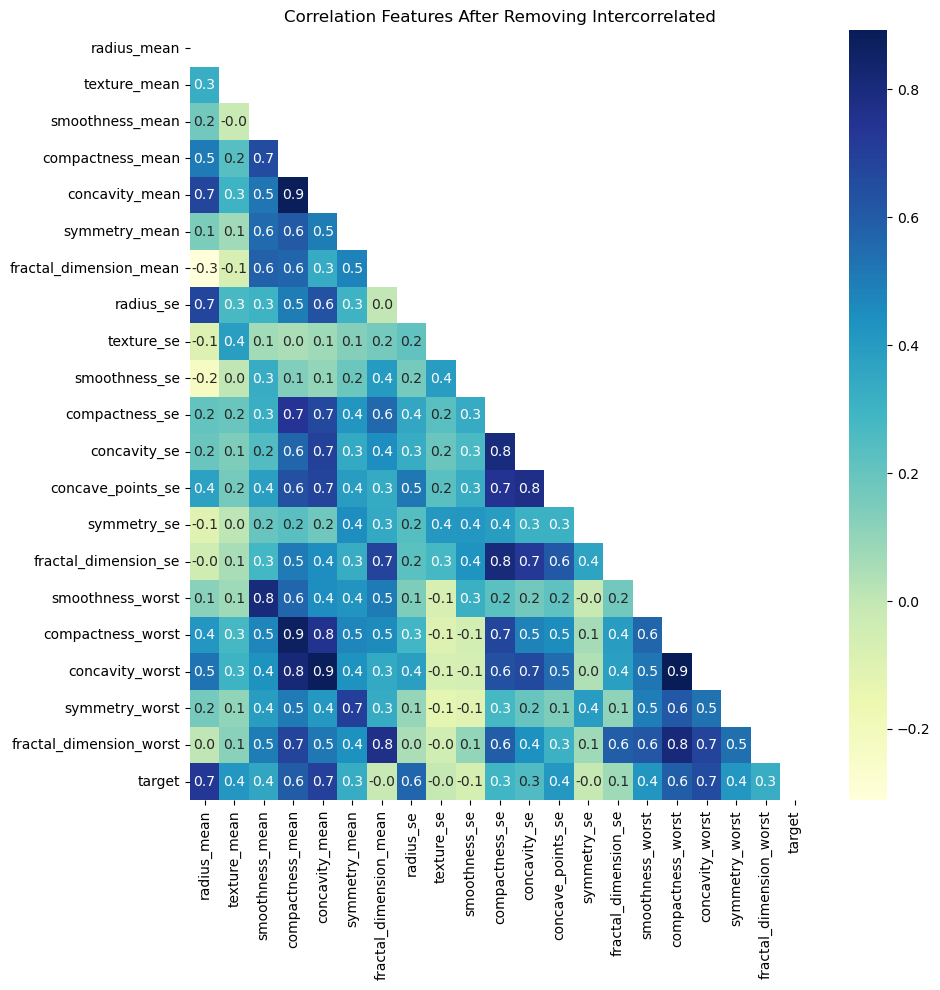

In [24]:
plt.figure(figsize=(10,10))
mask2 = np.triu(np.ones_like(df_filtered.corr()))
sns.heatmap(df_filtered.corr(), cmap="YlGnBu", annot=True, fmt='.1f', mask=mask2)
# displaying heatmap
plt.title('Correlation Features After Removing Intercorrelated')
plt.show()

In [25]:
# Find correlations with the target and sort
df_filtered.corr()['target'].sort_values(ascending=False)

target                     1.000000
radius_mean                0.730029
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave_points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0.008303
fractal_dimension_mean    -0.012838
smoothness_se             -0.067016
Name: target, dtype: float64

<div class="alert alert-block alert-info" style="font-size: 14px; font-family: verdana; background-color: #FFEBCD; color: #8B4513; border-color: #D2691E;">
    <span style="color: #8B4513; font-weight: bold;">📌 Observasi:</span>
    <br>
    - Setelah menghilangkan variabel-variabel yang saling berkorelasi, kumpulan data kini terdiri dari 21 variabel, turun dari sebelumnya 31 variabel, yang menunjukkan kumpulan fitur yang disederhanakan untuk analisis dan pemodelan lebih lanjut.
    <br>
    <span style="font-size: 14px;">- Variabel yang saling berkorelasi sering kali dihilangkan dalam pembelajaran mesin untuk mengurangi multikolinearitas, yang dapat menyebabkan koefisien model tidak stabil dan mengurangi kemampuan interpretasi model. Dengan menghilangkan fitur-fitur yang redundant, kami bertujuan untuk meningkatkan kinerja model dan menghindari overfitting, memastikan bahwa variabel yang dipilih berkontribusi secara independen terhadap kekuatan prediksi model.</span>
</div>

**Outlier Handling**

In [26]:
# Menyiapkan fungsi untuk membuat histogram dan boxplot
def cek_plot(dataset, kolom):
    fig,ax = plt.subplots(1,2, figsize=(9,4))

    # Histogram
    sns.histplot(dataset[kolom], bins=30, ax=ax[0])
    ax[0].set_title('Histogram')

    # Boxplot
    sns.boxplot(y=dataset[kolom], ax=ax[1])
    ax[1].set_title('Boxplot')

    # Judul utama
    fig.suptitle('Analisis variabel ' + str(kolom))

    # Menampilkan gambar
    plt.show()

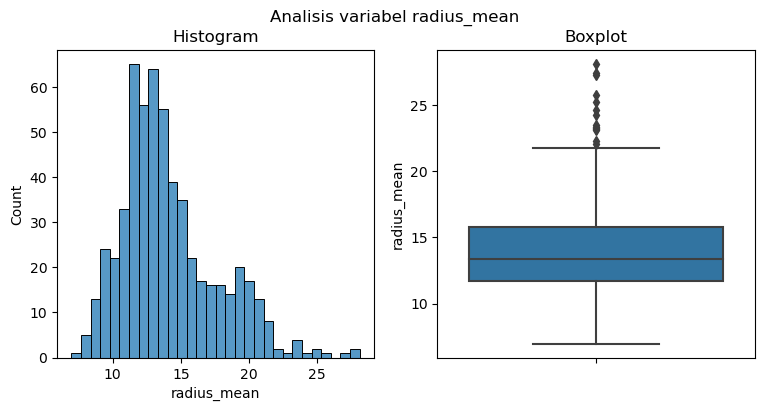

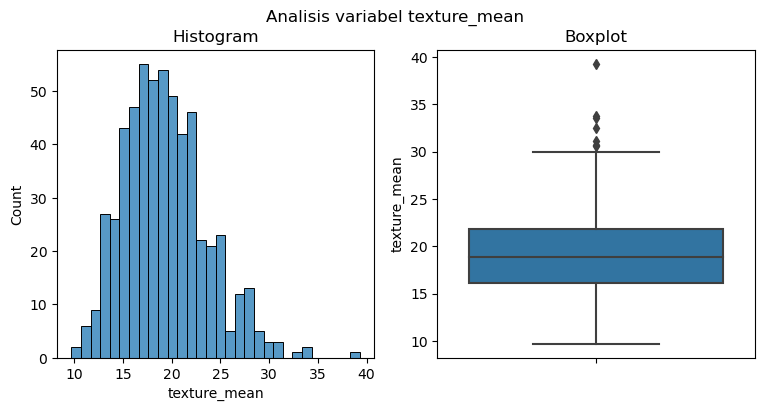

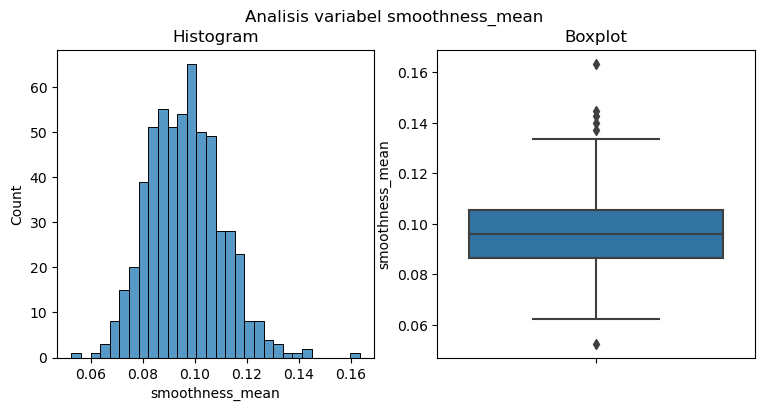

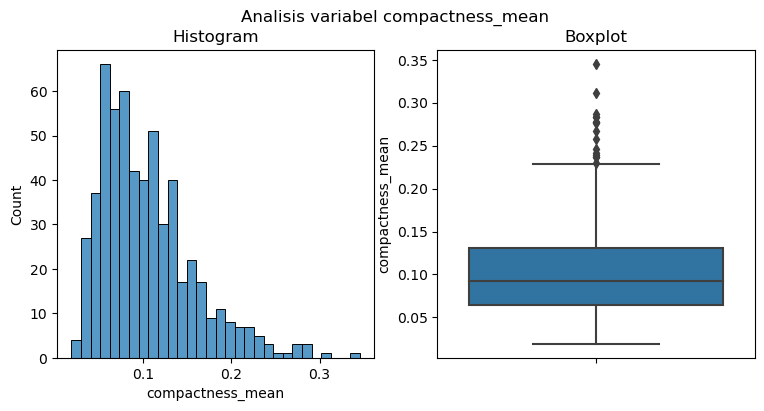

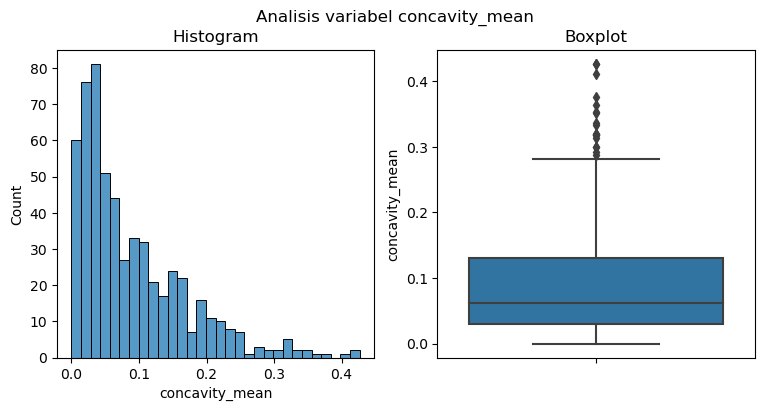

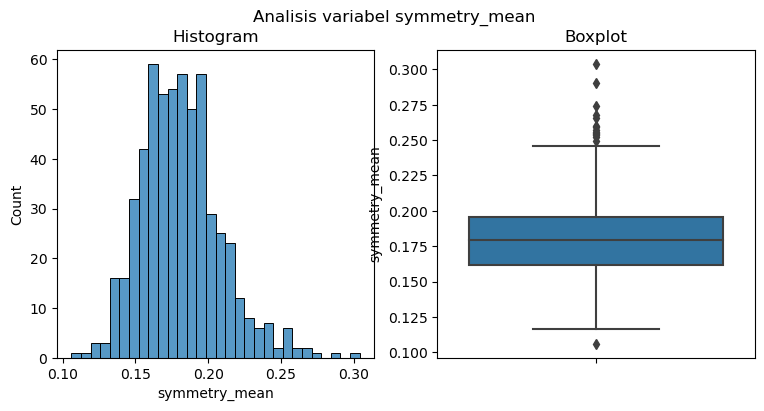

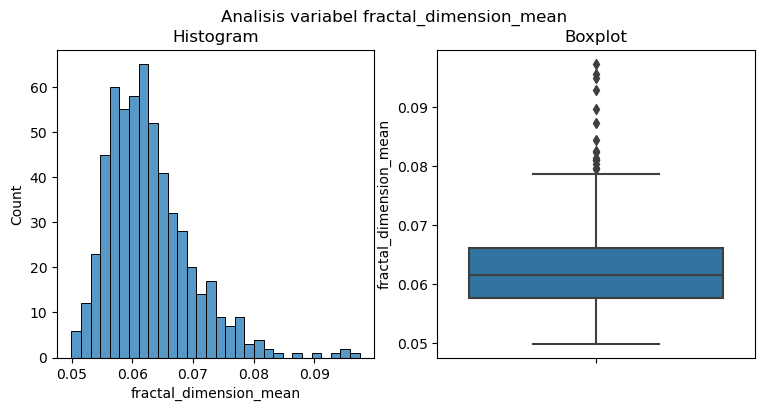

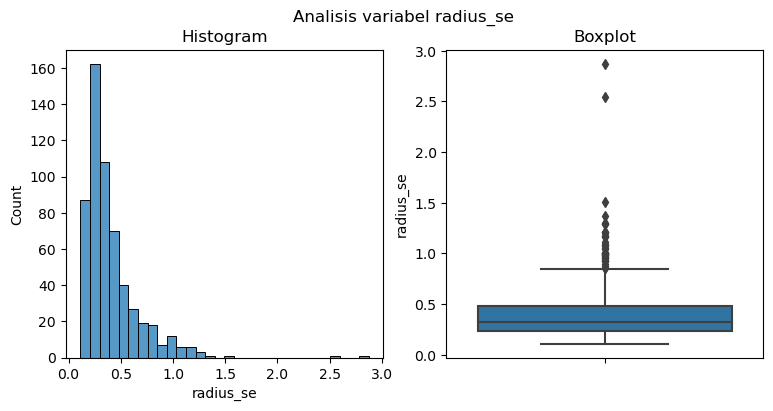

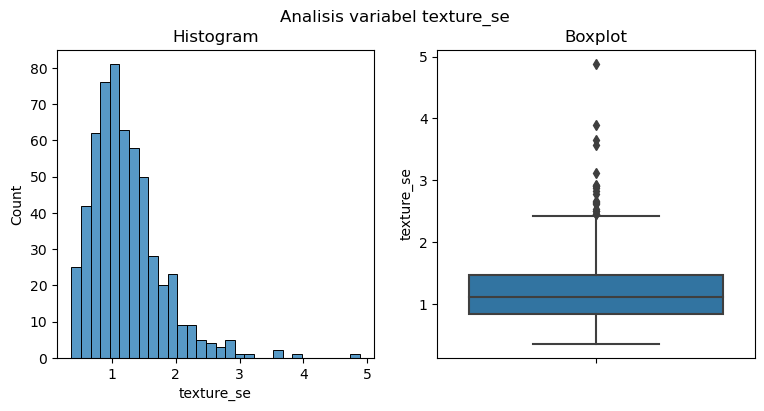

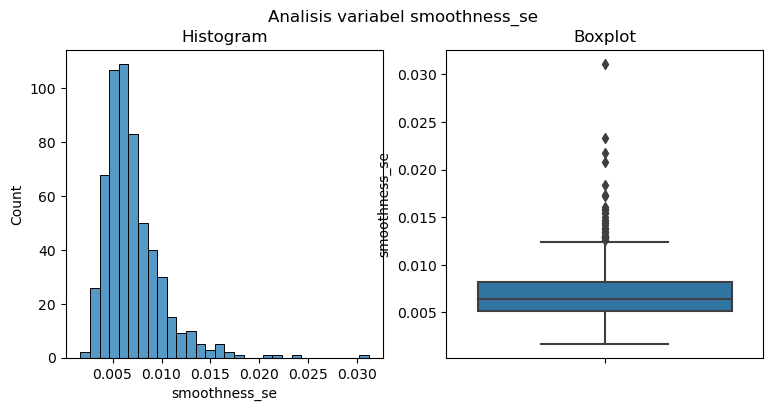

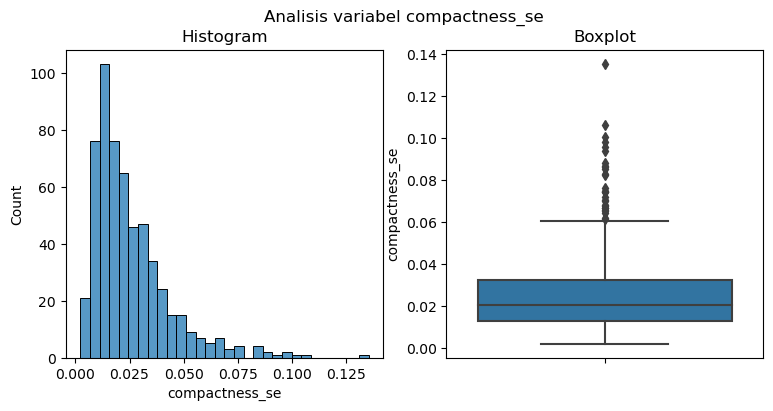

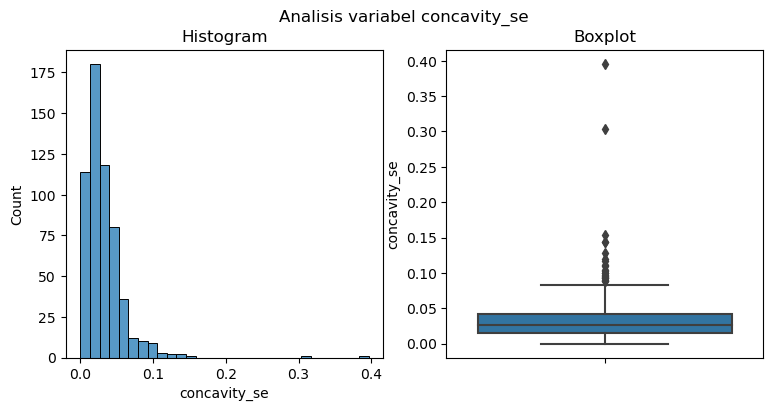

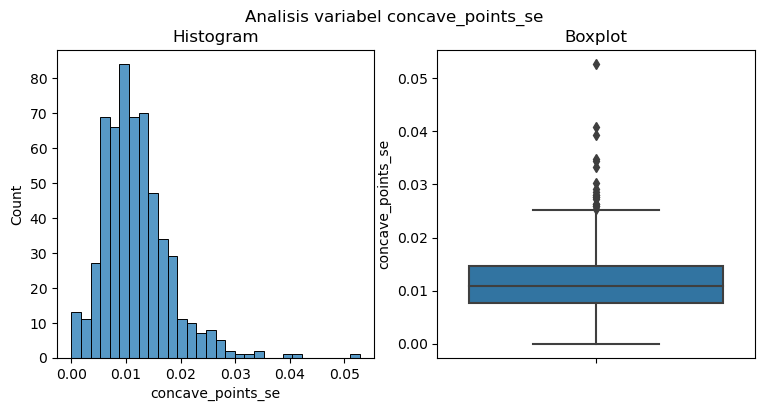

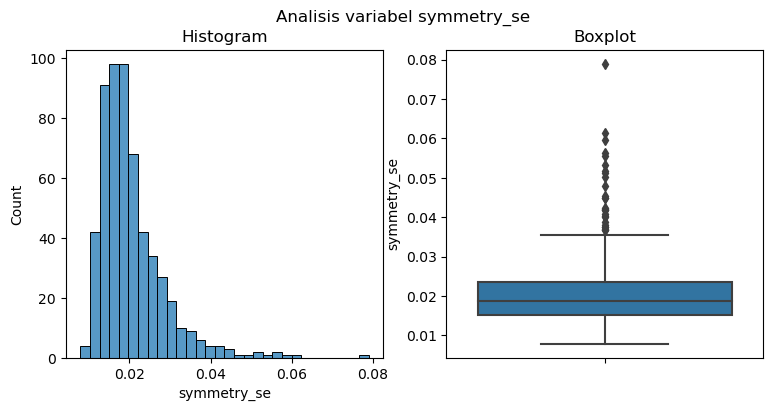

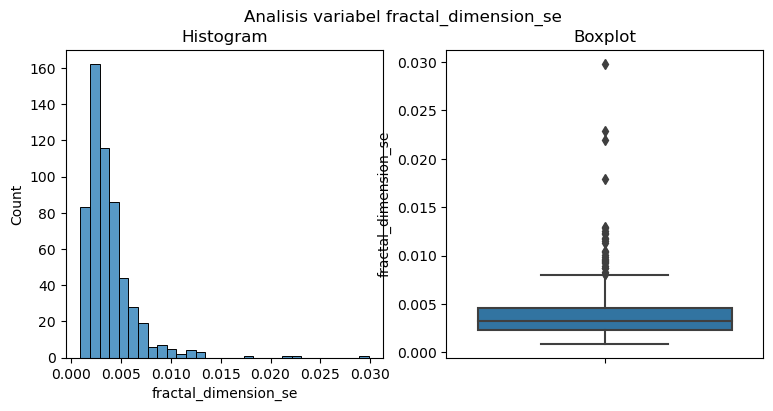

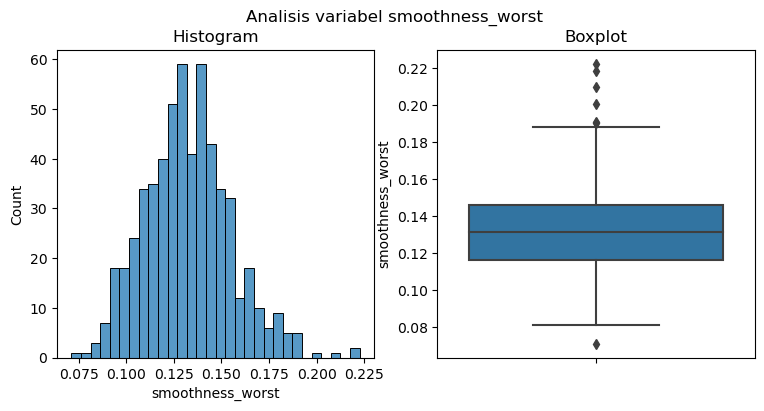

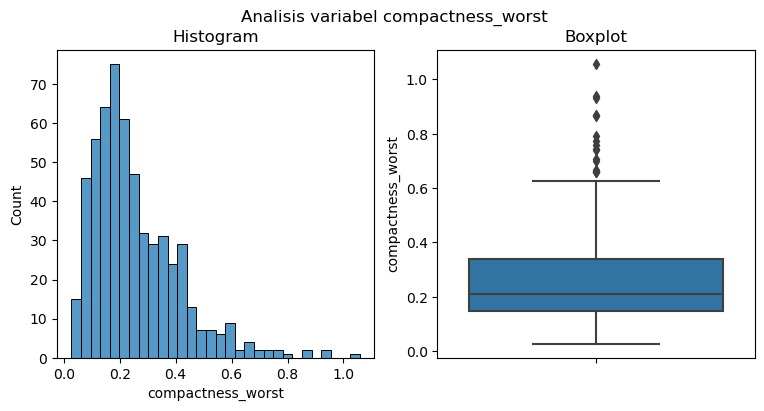

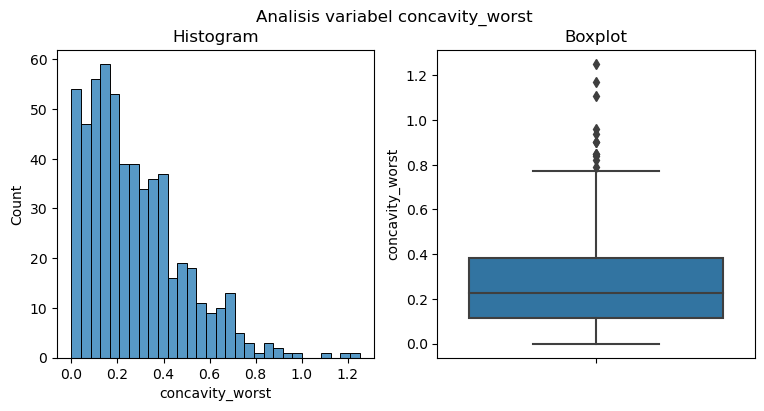

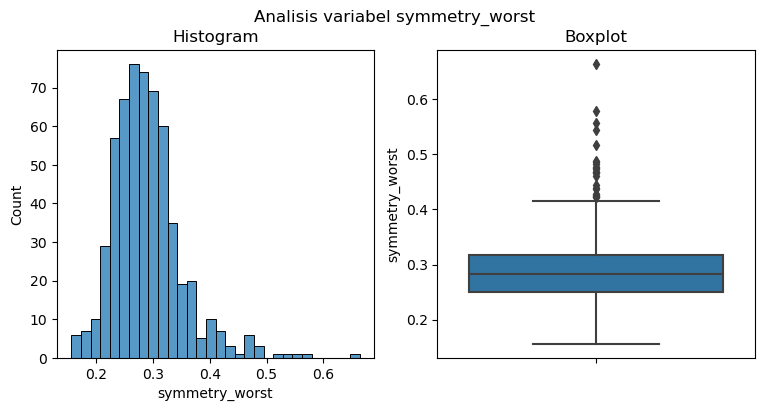

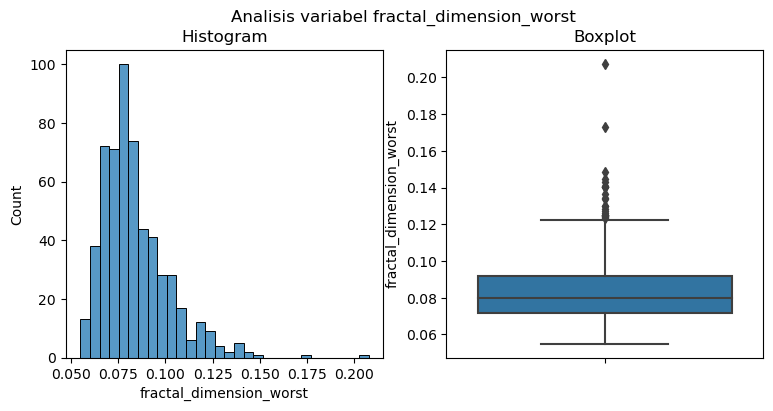

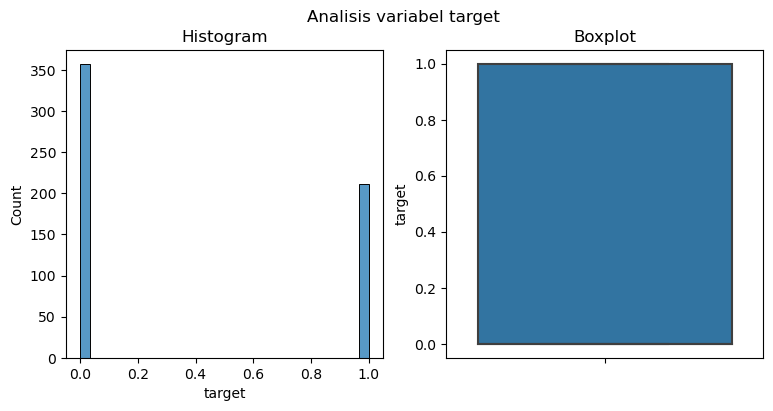

In [27]:
for column in df_filtered.columns:
    cek_plot(df_filtered, column)

In [28]:
# Fungsi mendeteksi normal atau skewed
def split_norm_skew_test(data):
    # Membuat data frame dengan nama kolom: feature, skewness, distribution
    global distribution_df
    distribution_df = pd.DataFrame(columns=['feature', 'skewness', 'distribution'])
    for i in range(len(data.columns)):
        if data[data.columns[i]].skew() > -0.5 and data[data.columns[i]].skew() < 0.5:
            distribution_df.loc[i] = [data.columns[i], data[data.columns[i]].skew(), 'normal']
        else:
            distribution_df.loc[i] = [data.columns[i], data[data.columns[i]].skew(), 'skewed']
    print('Membuat tabel "distribution_df"')


# Menjalankan fungsinya
split_norm_skew_test(df_filtered)

Membuat tabel "distribution_df"


In [29]:
# Melihat hasil deteksinya
distribution_df.sort_values(by='distribution', ascending=False)

,feature,skewness,distribution
0,radius_mean,0.942380,skewed
1,texture_mean,0.650450,skewed
19,fractal_dimension_worst,1.662579,skewed
18,symmetry_worst,1.433928,skewed
17,concavity_worst,1.150237,skewed
16,compactness_worst,1.473555,skewed
14,fractal_dimension_se,3.923969,skewed
13,symmetry_se,2.195133,skewed
12,concave_points_se,1.444678,skewed
11,concavity_se,5.110463,skewed


In [30]:
# Method 1: Z-score method to detect outliers
z_scores = np.abs((X - X.mean()) / X.std())
outliers_zscore = df_filtered[(z_scores > 3).any(axis=1)]
filtered_zscore = df_filtered.drop(outliers_zscore.index)

# Method 2: IQR method to detect outliers
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df_filtered[((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
filtered_iqr = df_filtered.drop(outliers_iqr.index)

In [31]:
outliers_iqr

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.4601,0.11890,1
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.2750,0.08902,1
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.3613,0.08758,1
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.6638,0.17300,1
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,0.10990,0.22360,0.3174,0.2149,0.06879,0.9622,1.0260,0.006399,0.04310,0.07845,0.02624,0.02057,0.006213,0.14070,0.41860,0.6599,0.2929,0.09873,1
564,21.56,22.39,0.11100,0.11590,0.2439,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115,1
565,20.13,28.25,0.09780,0.10340,0.1440,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637,1
567,20.60,29.33,0.11780,0.27700,0.3514,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400,1


In [32]:
print("Shape of filtered DataFrame after Z-score method:", filtered_zscore.shape)
print("Shape of filtered DataFrame after IQR method:", filtered_iqr.shape)

Shape of filtered DataFrame after Z-score method: (495, 21)
Shape of filtered DataFrame after IQR method: (398, 21)


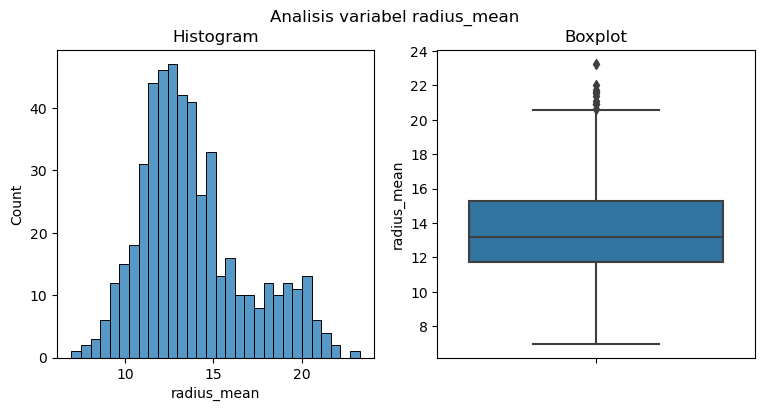

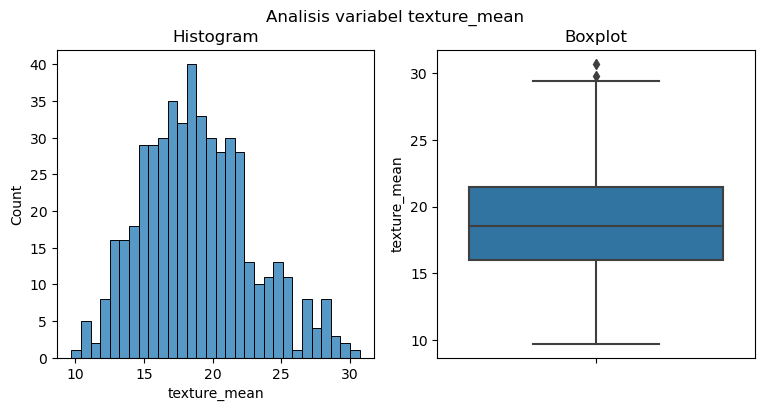

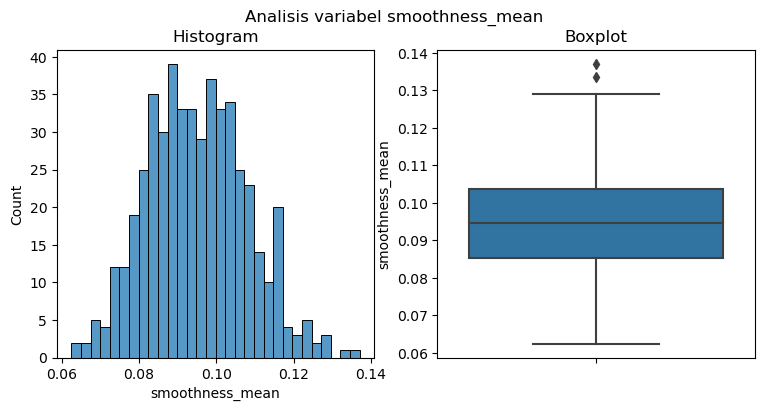

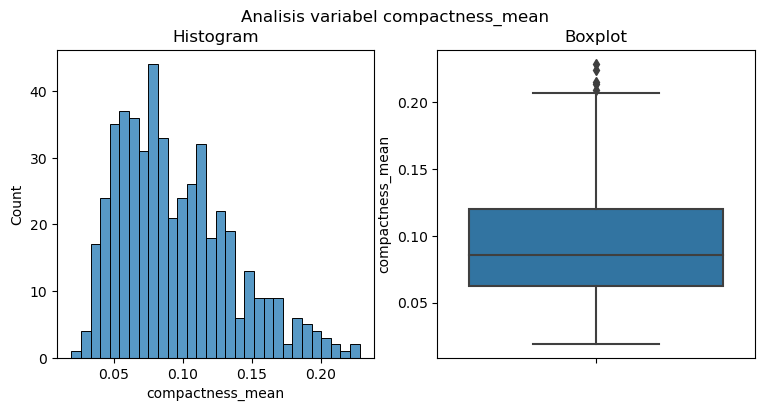

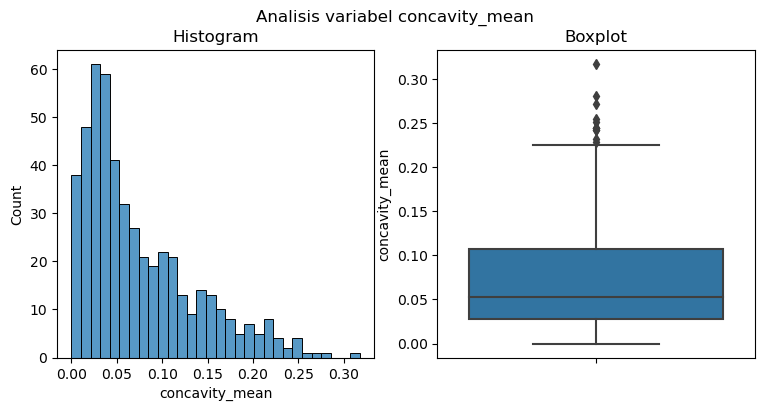

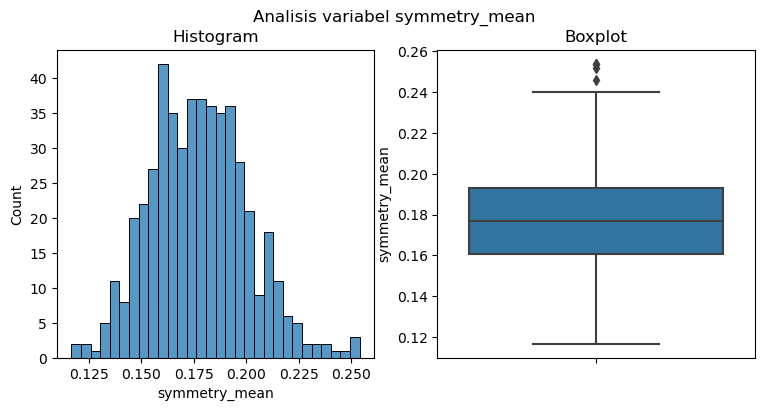

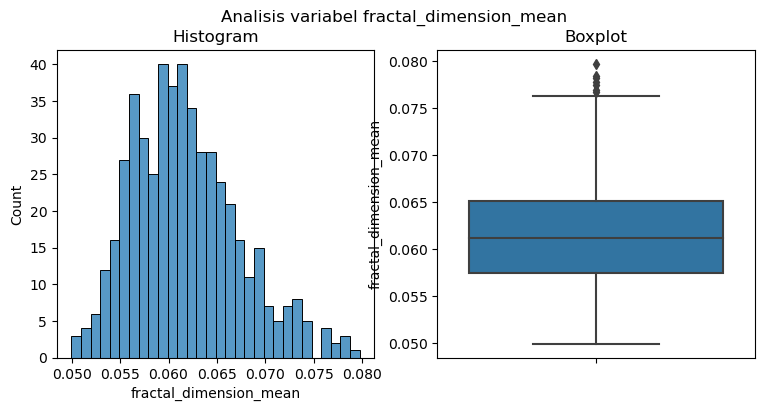

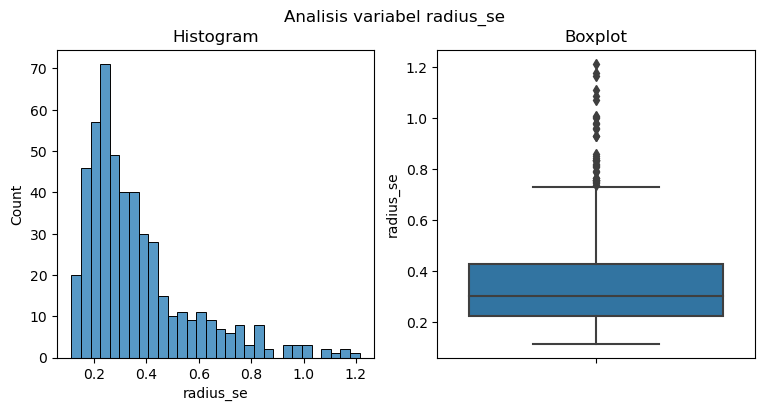

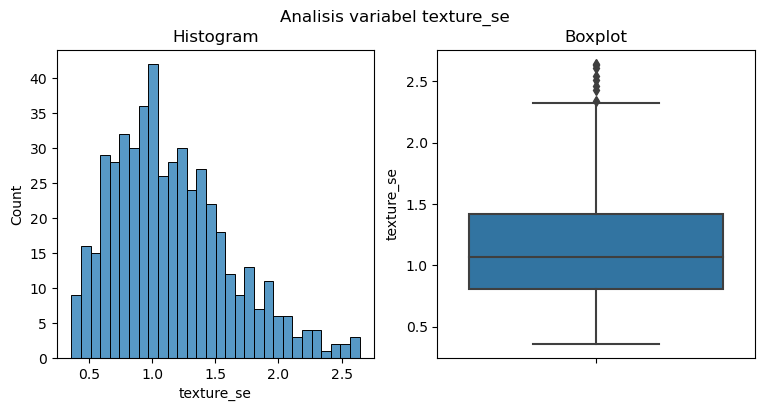

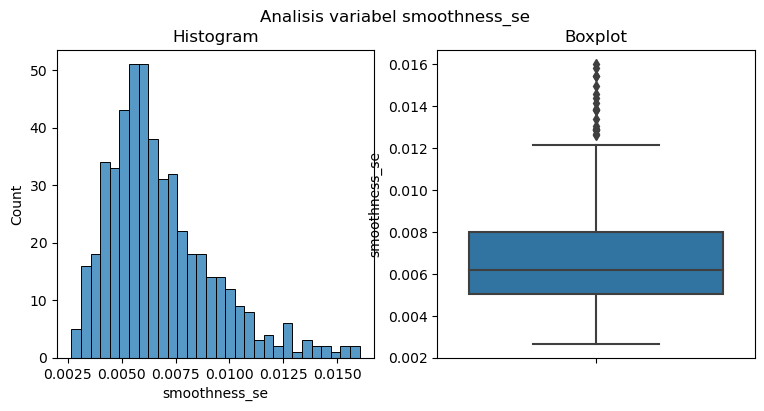

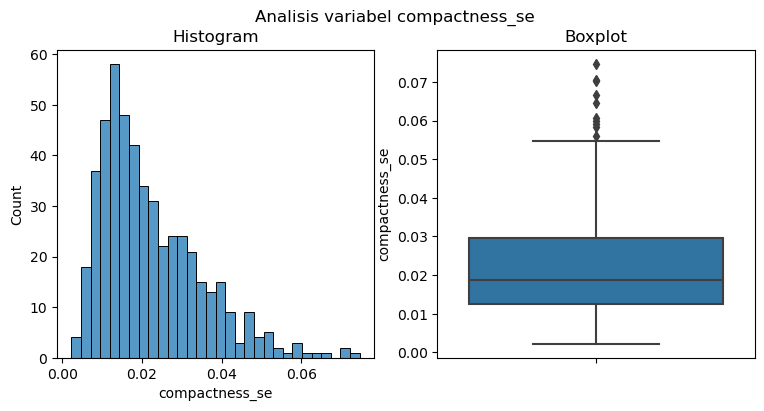

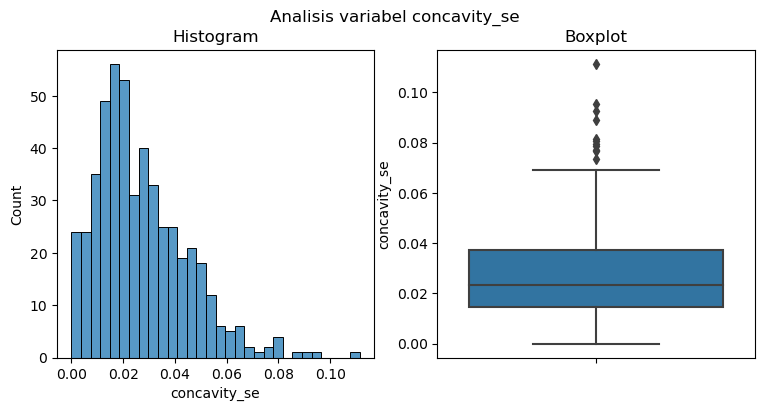

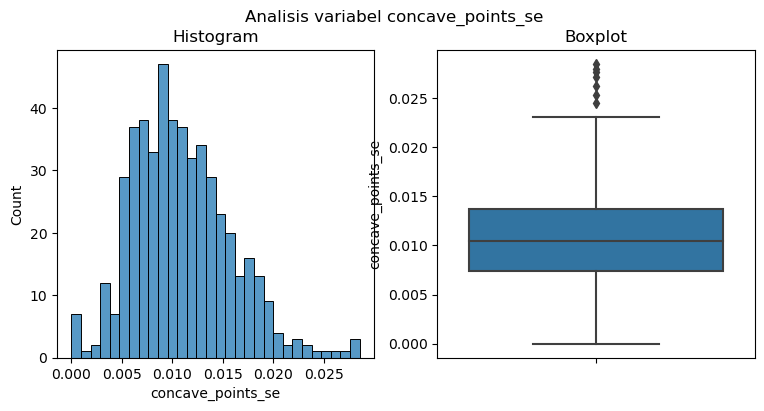

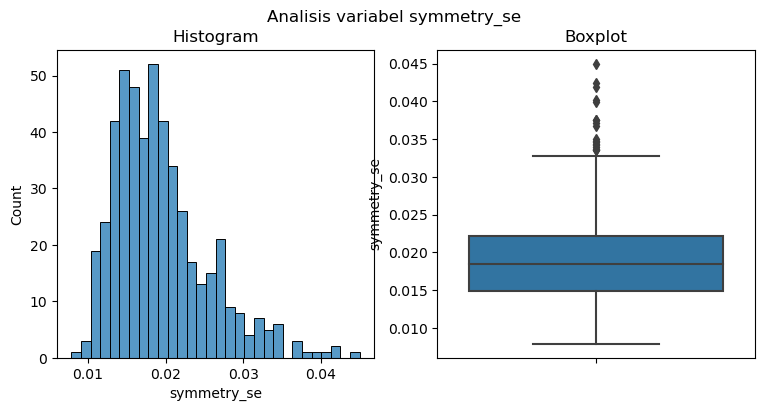

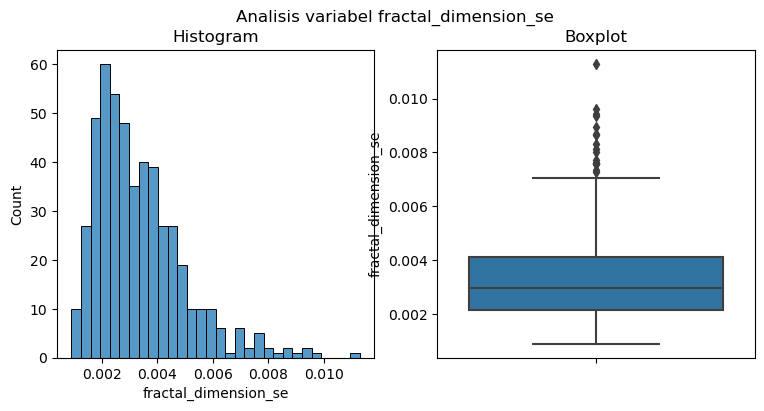

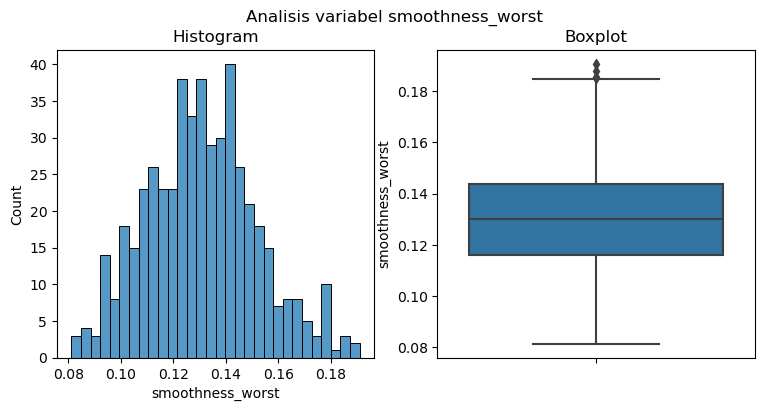

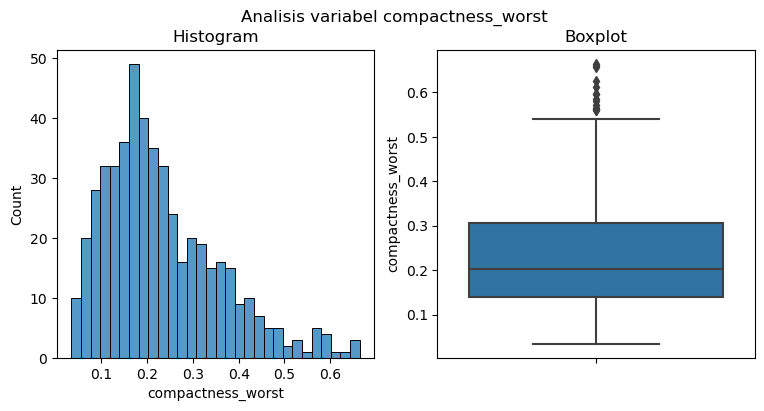

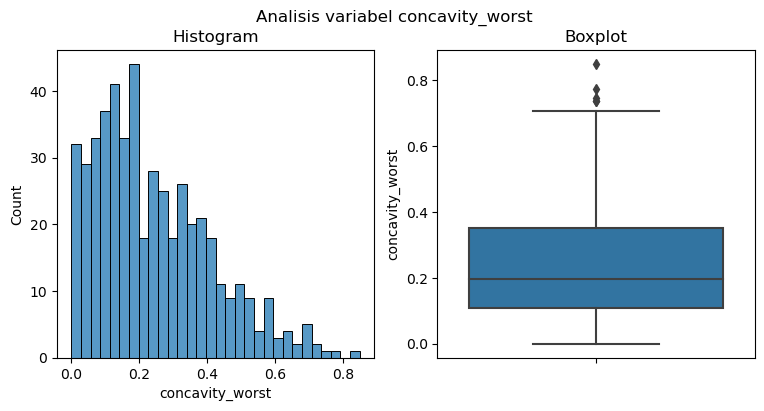

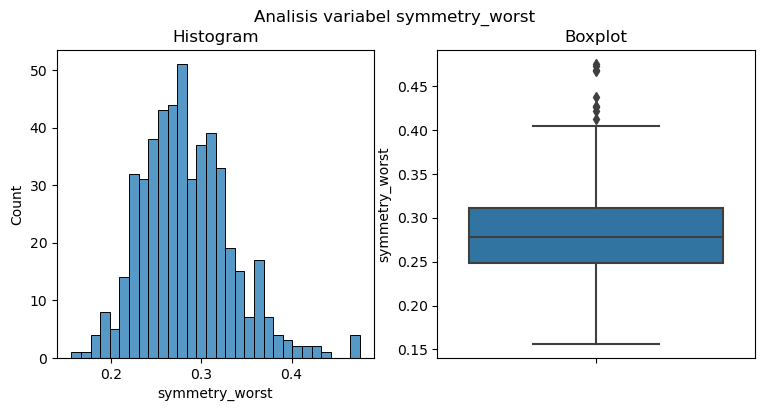

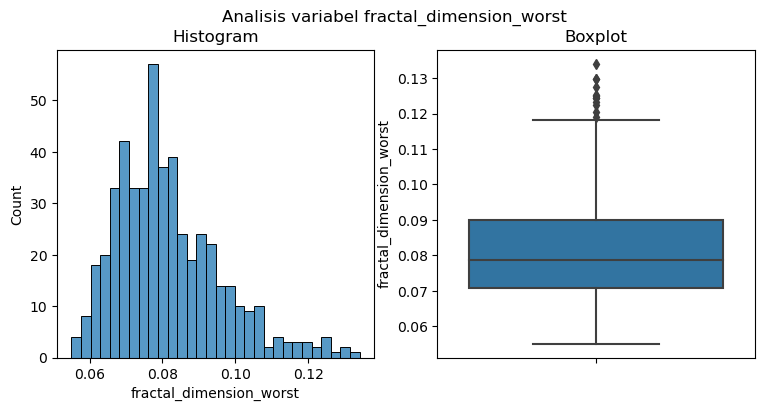

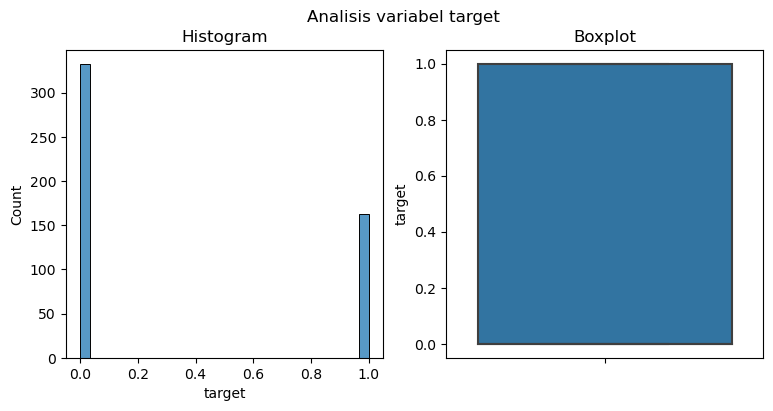

In [33]:
# Choose IQR method
#plt.figure(figsize=(20,60), facecolor='white')
#plotnumber =1
#for i in filtered_iqr.columns:
#    ax = plt.subplot(12,3,plotnumber)
#    sns.boxplot(filtered_iqr[i])
#    plt.xlabel(i)
#    plotnumber+=1
#plt.show()

for column in filtered_zscore.columns:
    cek_plot(filtered_zscore, column)

<div class="alert alert-block alert-info" style="font-size: 14px; font-family: verdana; background-color: #FFEBCD; color: #8B4513; border-color: #D2691E;">
    <span style="color: #8B4513; font-weight: bold;">📌 Observasi:</span>
    <br>
    Setelah menggunakan berbagai metode deteksi outlier, kumpulan data disaring menjadi 21 variabel dengan bentuk berbeda:
     <br>
    - Bentuk DataFrame yang difilter setelah metode Z-score: (495, 21)
     <br>
    - Bentuk DataFrame yang difilter setelah metode IQR: (398, 21)
    <br>
    <span style="font-size: 14px;">Kami memilih untuk melanjutkan hasil dari metode Z-score karena distribusi cenderung skewed, menghasilkan kumpulan data 495 sampel dan 21 variabel. Pada metode Z-Score berusaha mengasumsikan data yang berada di ekor distribusi dan relatif jauh dari rata-rata dapat dikatakan sebagai outlier. Kita dapat menghitung nilai Z-Score dari setiap data dengan mengurangi nilai setiap data dengan rata-rata dari kumpulan data lalu dibagi dengan nilai standar deviasi. Kemudian tentukan nilai ambang batas 3 dan hapus data yang lebih besar dari 3 tersebut sebagai outlier.</span>
</div>

**Splitting Data**

In [34]:
# Mendefinisikan X dan y
X = filtered_zscore.drop('target', axis=1)
y = filtered_zscore['target']

In [35]:
# Melihat X
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678
5,12.45,15.70,0.12780,0.17000,0.1578,0.2087,0.07613,0.3345,0.8902,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,0.1791,0.5249,0.5355,0.3985,0.12440
6,18.25,19.98,0.09463,0.10900,0.1127,0.1794,0.05742,0.4467,0.7732,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,0.1442,0.2576,0.3784,0.3063,0.08368


In [36]:
# Melihat y
y.head()

1    1
2    1
4    1
5    1
6    1
Name: target, dtype: int32

In [37]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42)

# Reset indeks dengan looping
for i in [X_train, X_test, y_train, y_test]:
    i.reset_index(drop=True, inplace=True)

# Melihat dimensi training set dan test set
print(X_train.shape, X_test.shape)

(396, 20) (99, 20)


In [38]:
# Menentukan variabel target
target = 'target'

In [39]:
# Melakukan feature scaling
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [40]:
# Melihat X_train
X_train = pd.DataFrame(X_train, columns = mm.get_feature_names_out())
X_train.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0.482506,0.646359,0.325915,0.224763,0.264335,0.317128,0.132791,0.274009,0.554562,0.422119,0.209335,0.304219,0.552401,0.256495,0.185588,0.455540,0.198149,0.315114,0.286073,0.168480
1,0.252741,0.444074,0.253117,0.132188,0.116856,0.234106,0.217818,0.143961,0.254636,0.494653,0.096111,0.185189,0.314231,0.375876,0.115538,0.435477,0.091503,0.170102,0.261920,0.143815
2,0.233885,0.338886,0.605845,0.280643,0.095967,0.382199,0.445799,0.074845,0.449340,0.186271,0.098029,0.094794,0.262285,0.250566,0.120563,0.507524,0.182301,0.125692,0.449498,0.300658
3,0.663384,0.588291,0.465880,0.337623,0.285476,0.496634,0.188347,0.278192,0.164935,0.136544,0.135361,0.183842,0.346127,0.095882,0.060368,0.679891,0.355990,0.458122,0.517880,0.261321
4,0.316293,0.491671,0.631318,0.458425,0.257561,0.688856,0.633469,0.060658,0.190188,0.269573,0.272268,0.356014,0.346793,0.143311,0.276604,0.537620,0.315650,0.416421,0.358846,0.421832


In [41]:
# Melihat X_test
X_test = pd.DataFrame(X_test, columns = mm.get_feature_names_out())
X_test.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0.150569,0.284150,0.434509,0.310066,0.073409,0.137622,0.632453,0.123136,0.374370,0.453526,0.250738,0.095332,0.238381,0.279131,0.245783,0.553124,0.304124,0.099352,0.293915,0.468631
1,0.483903,0.681104,0.365062,0.319013,0.097732,0.360509,0.285230,0.234358,0.328335,0.164585,0.219824,0.100628,0.301647,0.349466,0.187714,0.275878,0.227765,0.108246,0.300188,0.220339
2,0.354005,0.434555,0.459177,0.287724,0.084688,0.415856,0.392615,0.097217,0.404621,0.219921,0.196086,0.137253,0.350403,0.302037,0.114282,0.442772,0.239451,0.147838,0.369824,0.219327
3,0.529297,0.152308,0.258882,0.205339,0.185633,0.116679,0.170054,0.090033,0.000307,0.121439,0.139502,0.165260,0.258430,0.044653,0.068195,0.373461,0.294999,0.348922,0.236826,0.249178
4,0.072840,0.339362,0.554900,0.262654,0.000000,0.584892,0.702575,0.366042,0.752729,0.983549,0.240250,0.000000,0.000000,0.290180,0.559025,0.590515,0.154767,0.000000,0.276035,0.425120


### Modeling using Keras

Buat *neural network* dengan 3 lapis (*layers*), kemudian di setiap *layer*nya terdiri dari beberapa *neuron*:
- 12 neuron di *layer* pertama dengan *activation function* ReLu (*Rectifier Linear Unit*) --> sekaligus ada *input* dengan 20 *features*
- 8 neuron di *layer* kedua dengan *activation function* ReLu (*Rectifier Linear Unit*)
- 1 neuron di *layer* ketiga dengan *activation function* Sigmoid --> sekaligus sebagai *output layer*

In [42]:
# Mendefinisikan model Keras
model = Sequential()
model.add(Dense(12, input_shape=(20,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
# Melihat ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                252       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


Sebelum kita lakukan *fitting* model kita ke *training set*, maka kita ahrus pahami beberapa parameter di keras.
- `epochs` = ini merupakan berapa kali moidelnya melakukan training bolak balik, di mana 1x epoch artinya sudah melakukan 1x forward dan 1x backward propagation
- `batch_size` = berapa banyak baris data yang diikutkan dalam proses *training* dan mengupdate nilai W dalam setiap *epoch*nya


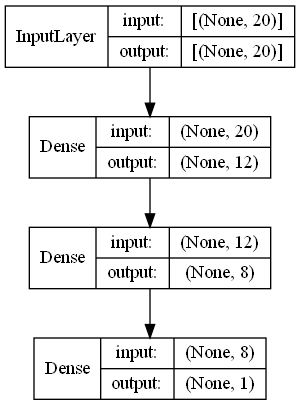

In [45]:
# Visualisasi Model (pastikan sudah install pydot dan graphviz)
from keras.utils.vis_utils import plot_model
#from tensorflow.keras.utils import plot_model

plot_model(model, to_file='modelkeras_plot.png', show_shapes=True, show_layer_names=False)

In [46]:
# Mulai melakukan training model
run_model = model.fit(X_train,
               y_train,
               batch_size = 30,
               epochs = 80,
               verbose = 1, # matikan progress bar dengan set verbose=0
               validation_data = (X_test, y_test))

Epoch 1/80
14/14 [==============================] - 1s 19ms/step - loss: 0.7099 - accuracy: 0.3207 - val_loss: 0.6728 - val_accuracy: 0.4545
Epoch 2/80
14/14 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.5152 - val_loss: 0.6533 - val_accuracy: 0.7576
Epoch 3/80
14/14 [==============================] - 0s 3ms/step - loss: 0.6389 - accuracy: 0.8258 - val_loss: 0.6393 - val_accuracy: 0.7475
Epoch 4/80
14/14 [==============================] - 0s 3ms/step - loss: 0.6100 - accuracy: 0.8207 - val_loss: 0.6237 - val_accuracy: 0.6970
Epoch 5/80
14/14 [==============================] - 0s 3ms/step - loss: 0.5828 - accuracy: 0.8056 - val_loss: 0.6000 - val_accuracy: 0.7071
Epoch 6/80
14/14 [==============================] - 0s 3ms/step - loss: 0.5579 - accuracy: 0.8157 - val_loss: 0.5782 - val_accuracy: 0.7172
Epoch 7/80
14/14 [==============================] - 0s 3ms/step - loss: 0.5342 - accuracy: 0.8232 - val_loss: 0.5508 - val_accuracy: 0.7475
Epoch 8/80
14/14 [=

14/14 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.9697 - val_loss: 0.0864 - val_accuracy: 0.9596
Epoch 60/80
14/14 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 0.9747 - val_loss: 0.0844 - val_accuracy: 0.9697
Epoch 61/80
14/14 [==============================] - 0s 3ms/step - loss: 0.0964 - accuracy: 0.9773 - val_loss: 0.0828 - val_accuracy: 0.9697
Epoch 62/80
14/14 [==============================] - 0s 3ms/step - loss: 0.0949 - accuracy: 0.9773 - val_loss: 0.0814 - val_accuracy: 0.9697
Epoch 63/80
14/14 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.9747 - val_loss: 0.0806 - val_accuracy: 0.9697
Epoch 64/80
14/14 [==============================] - 0s 3ms/step - loss: 0.0945 - accuracy: 0.9722 - val_loss: 0.0799 - val_accuracy: 0.9697
Epoch 65/80
14/14 [==============================] - 0s 3ms/step - loss: 0.0916 - accuracy: 0.9747 - val_loss: 0.0787 - val_accuracy: 0.9697
Epoch 66/80
14/14 [======

Hasil dari proses *fitting* di atas memunculkan 2 nilai utama:
- `loss` = ini merupakan nilai yang ingin diminimasi. Semakin kecil nilainya maka semakin dekat kita dengan nilai y yang sesungguhnya.
- `accuracy`= nilai akurasi dari hasil klasifikasi yang kita lakukan, artinya seberapa banyak label yang berhasil kita prediksi.
- `val_loss` = nilai loss di *test set*
- `val_accuracy` = nilai akurasi di *test set*

In [47]:
# Melihat parameter apa saja yang disimpan
print(run_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


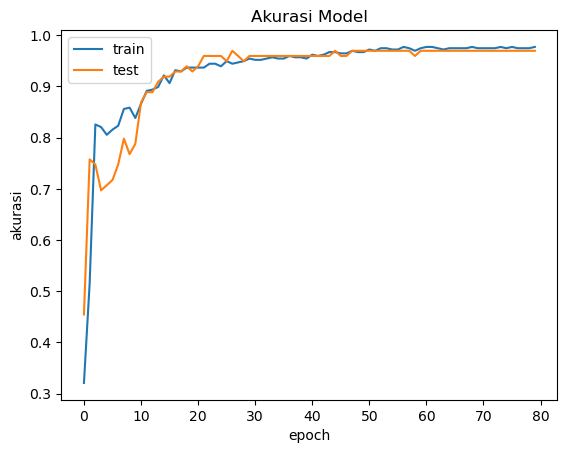

In [48]:
# Proses plotting accuracy selama proses training
plt.plot(run_model.history['accuracy'])
plt.plot(run_model.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('akurasi')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc=0)
plt.show()

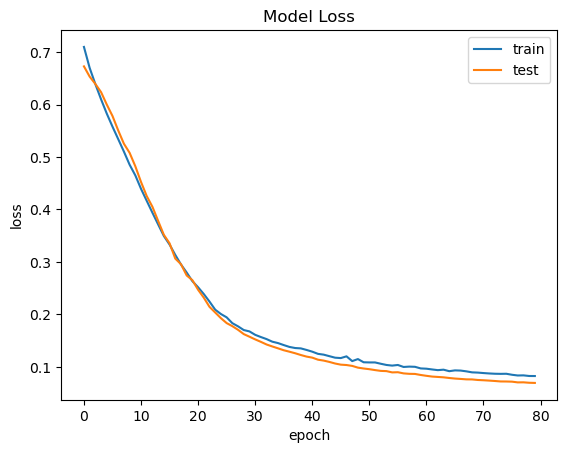

In [49]:
# Proses plotting loss selama proses training
plt.plot(run_model.history['loss'])
plt.plot(run_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc=0)
plt.show()

In [50]:
# Memprediksi X_test
y_pred = model.predict(X_test)
y_pred

4/4 [==============================] - 0s 2ms/step


array([[5.98295417e-04],
       [1.31228983e-01],
       [3.95103451e-03],
       [1.52263820e-01],
       [2.27499942e-04],
       [9.98268902e-01],
       [2.03477917e-03],
       [4.15091781e-04],
       [3.79162678e-03],
       [3.17022204e-01],
       [9.87073064e-01],
       [5.54376543e-01],
       [9.85030783e-04],
       [9.67633784e-01],
       [5.65509871e-03],
       [9.97551322e-01],
       [9.96962011e-01],
       [9.07882035e-01],
       [9.99045610e-01],
       [4.77851136e-05],
       [8.79416615e-02],
       [9.98636186e-01],
       [5.17917462e-02],
       [8.88462067e-02],
       [9.98936236e-01],
       [2.02802203e-05],
       [2.16015324e-04],
       [3.84354411e-04],
       [9.94968891e-01],
       [9.96202290e-01],
       [3.57090123e-03],
       [6.39743209e-02],
       [9.12479639e-01],
       [9.96653438e-01],
       [1.33248197e-03],
       [3.13874887e-04],
       [2.96277199e-02],
       [9.99378562e-01],
       [2.79495027e-02],
       [6.68638758e-03],


Perlu diperhatikan bahwa hasil prediksinya berupa nilai probabilitas antara 0-1 karena kita gunakan *activation function* sigmoid.

Karena yang kita butuhkan adalah hasil antara 0 atau 1, maka fungsi prediksinya kita modifikasi, di mana jika nilai probabilitasnya lebih besar dari 0.5 maka kita jadikan nilainya menjadi 1 sebagai berikut:

In [51]:
# Memprediksi X_test dengan pembulatan ke atas
pred_test = (model.predict(X_test) > 0.5).astype(int)
pred_test

4/4 [==============================] - 0s 1ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [52]:
# Menghitung metrics klasifikasi satu per satu
print('Nilai akurasi: {:.2f}'.format(accuracy_score(y_test, pred_test)))
print('Nilai presisi: {:.2f}'.format(precision_score(y_test, pred_test)))
print('Nilai recall: {:.2f}'.format(recall_score(y_test, pred_test)))
print('Nilai f1: {:.2f}'.format(f1_score(y_test, pred_test)))
print('Nilai AUC: {:.2f}'.format(roc_auc_score(y_test, model.predict(X_test))))

Nilai akurasi: 0.97
Nilai presisi: 0.97
Nilai recall: 0.95
Nilai f1: 0.96
4/4 [==============================] - 0s 2ms/step
Nilai AUC: 1.00


Nilai akurasi di atas juga bisa dihasilkan melalui *method* `.evaluate()` sebagai berikut:

In [53]:
# Evaluasi model keras
_, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {_:.4f}')
print(f'Akurasi: {accuracy:.4f}')

4/4 [==============================] - 0s 2ms/step - loss: 0.0692 - accuracy: 0.9697
Loss: 0.0692
Akurasi: 0.9697


In [54]:
# Memprediksi 5 baris pertama\
for i in range(5):
    print(f'{X_test.iloc[i,:].tolist()} ==> {pred_test[i]} (seharusnya {y_test[i]})')

[0.1505691738249877, 0.28415040456925267, 0.4345086472717523, 0.3100660223902019, 0.07340894770006302, 0.13762154076290178, 0.6324525745257452, 0.12313568570389233, 0.37436976632031216, 0.45352576086143725, 0.25073835877335837, 0.09533213644524237, 0.23838065194532068, 0.27913118465021014, 0.24578252719859323, 0.5531235750114, 0.3041237113402062, 0.09935210272116857, 0.29391468005018817, 0.46863141917531004] ==> [0] (seharusnya 0)
[0.48390250715832084, 0.681104236078058, 0.36506234079635336, 0.31901253468567603, 0.09773156899810964, 0.3605086013462977, 0.2852303523035231, 0.23435794834485268, 0.3283353062387654, 0.16458535855828904, 0.21982389798227944, 0.10062836624775584, 0.3016473887136348, 0.3494664223348065, 0.18771377224680674, 0.27587779297765624, 0.22776461548312738, 0.10824596536694546, 0.3001882057716436, 0.22033898305084754] ==> [0] (seharusnya 0)
[0.3540051679586562, 0.4345549738219895, 0.4591768333556776, 0.28772366280738687, 0.08468809073724008, 0.4158563949139864, 0.3926

In [55]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, pred_test)
cm

array([[60,  1],
       [ 2, 36]], dtype=int64)

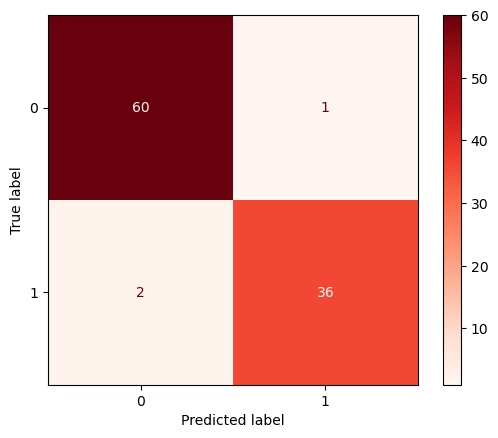

In [56]:
# Melihat confusion matrix dengan ConfusionMatrixDisplay()
vis_cm = ConfusionMatrixDisplay(confusion_matrix = cm,
                                display_labels = np.array([0,1]))
vis_cm.plot(cmap=plt.cm.Reds);

In [57]:
# Menyimpan model
model.save('model_bc.keras')

In [58]:
# Load model
modelku = tf.keras.models.load_model('model_bc.keras')
modelku.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                252       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Mencoba memprediksi X_test dengan modelku
modelku.predict(X_test)

4/4 [==============================] - 0s 1ms/step


array([[5.98295417e-04],
       [1.31228983e-01],
       [3.95103451e-03],
       [1.52263820e-01],
       [2.27499942e-04],
       [9.98268902e-01],
       [2.03477917e-03],
       [4.15091781e-04],
       [3.79162678e-03],
       [3.17022204e-01],
       [9.87073064e-01],
       [5.54376543e-01],
       [9.85030783e-04],
       [9.67633784e-01],
       [5.65509871e-03],
       [9.97551322e-01],
       [9.96962011e-01],
       [9.07882035e-01],
       [9.99045610e-01],
       [4.77851136e-05],
       [8.79416615e-02],
       [9.98636186e-01],
       [5.17917462e-02],
       [8.88462067e-02],
       [9.98936236e-01],
       [2.02802203e-05],
       [2.16015324e-04],
       [3.84354411e-04],
       [9.94968891e-01],
       [9.96202290e-01],
       [3.57090123e-03],
       [6.39743209e-02],
       [9.12479639e-01],
       [9.96653438e-01],
       [1.33248197e-03],
       [3.13874887e-04],
       [2.96277199e-02],
       [9.99378562e-01],
       [2.79495027e-02],
       [6.68638758e-03],


### Create pipeline using KerasClassifier

In [60]:
# Mengimpor KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#from scikeras.wrappers import KerasClassifier

In [61]:
# Membuat model sebagai fungsi
def buat_model():
    model = Sequential()
    model.add(Dense(12, input_shape=(20,), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [62]:
# Menjalankan fungsi buat_model dengan KerasClassifier
model = KerasClassifier(build_fn=buat_model,
                        epochs=80,
                        batch_size=30,
                        verbose=1)

C:\Users\endah\AppData\Local\Temp\ipykernel_20356\3020251680.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=buat_model,


In [63]:
# Membuat pipeline
model_dl = Pipeline([
    ('scaling', MinMaxScaler()),
    ('modeling', model)
])

In [64]:
# Melihat pipeline
model_dl

Pipeline(steps=[('scaling', MinMaxScaler()),
                ('modeling',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x000002CF93DDFD50>)])

In [65]:
# Menentukan jumlah fold cv
cv = KFold(n_splits=5)

In [66]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42)

In [67]:
# Menjalankan 10 fold cross-validation
skor = cross_val_score(model_dl, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=1)

Epoch 1/80
11/11 [==============================] - 1s 2ms/step - loss: 0.6331 - accuracy: 0.6994
Epoch 2/80
11/11 [==============================] - 0s 1ms/step - loss: 0.6155 - accuracy: 0.6962
Epoch 3/80
11/11 [==============================] - 0s 1ms/step - loss: 0.6019 - accuracy: 0.6962
Epoch 4/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5879 - accuracy: 0.6930
Epoch 5/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5733 - accuracy: 0.7089
Epoch 6/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5568 - accuracy: 0.7152
Epoch 7/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5405 - accuracy: 0.7373
Epoch 8/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5237 - accuracy: 0.7532
Epoch 9/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5066 - accuracy: 0.7690
Epoch 10/80
11/11 [==============================] - 0s 1ms/step - loss: 0.4900 - accuracy: 0.7943
Epoch 11/80
11/11 [

11/11 [==============================] - 0s 1ms/step - loss: 0.6556 - accuracy: 0.6909
Epoch 4/80
11/11 [==============================] - 0s 1ms/step - loss: 0.6469 - accuracy: 0.6909
Epoch 5/80
11/11 [==============================] - 0s 1ms/step - loss: 0.6388 - accuracy: 0.6909
Epoch 6/80
11/11 [==============================] - 0s 1ms/step - loss: 0.6318 - accuracy: 0.6909
Epoch 7/80
11/11 [==============================] - 0s 1ms/step - loss: 0.6222 - accuracy: 0.6909
Epoch 8/80
11/11 [==============================] - 0s 1ms/step - loss: 0.6111 - accuracy: 0.6909
Epoch 9/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5989 - accuracy: 0.6940
Epoch 10/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5851 - accuracy: 0.7003
Epoch 11/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5705 - accuracy: 0.7256
Epoch 12/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5541 - accuracy: 0.7634
Epoch 13/80
11/11 [=========

11/11 [==============================] - 0s 1ms/step - loss: 0.6295 - accuracy: 0.6656
Epoch 6/80
11/11 [==============================] - 0s 1ms/step - loss: 0.6162 - accuracy: 0.6656
Epoch 7/80
11/11 [==============================] - 0s 1ms/step - loss: 0.6006 - accuracy: 0.6656
Epoch 8/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5877 - accuracy: 0.6656
Epoch 9/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5702 - accuracy: 0.6688
Epoch 10/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5543 - accuracy: 0.6782
Epoch 11/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5373 - accuracy: 0.6972
Epoch 12/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.7287
Epoch 13/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.7382
Epoch 14/80
11/11 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 0.7823
Epoch 15/80
11/11 [=======

11/11 [==============================] - 0s 1ms/step - loss: 0.6227 - accuracy: 0.6909
Epoch 8/80
11/11 [==============================] - 0s 1ms/step - loss: 0.6104 - accuracy: 0.6909
Epoch 9/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5990 - accuracy: 0.6909
Epoch 10/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5851 - accuracy: 0.6909
Epoch 11/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5719 - accuracy: 0.6909
Epoch 12/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5562 - accuracy: 0.6940
Epoch 13/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5395 - accuracy: 0.7192
Epoch 14/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.7382
Epoch 15/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5034 - accuracy: 0.7697
Epoch 16/80
11/11 [==============================] - 0s 1ms/step - loss: 0.4840 - accuracy: 0.8044
Epoch 17/80
11/11 [=====

11/11 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.6183
Epoch 3/80
11/11 [==============================] - 0s 1ms/step - loss: 0.6712 - accuracy: 0.7003
Epoch 4/80
11/11 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.6845
Epoch 5/80
11/11 [==============================] - 0s 1ms/step - loss: 0.6460 - accuracy: 0.6814
Epoch 6/80
11/11 [==============================] - 0s 1ms/step - loss: 0.6343 - accuracy: 0.6814
Epoch 7/80
11/11 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.6814
Epoch 8/80
11/11 [==============================] - 0s 1ms/step - loss: 0.6082 - accuracy: 0.6814
Epoch 9/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5922 - accuracy: 0.6814
Epoch 10/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5741 - accuracy: 0.6814
Epoch 11/80
11/11 [==============================] - 0s 1ms/step - loss: 0.5539 - accuracy: 0.6814
Epoch 12/80
11/11 [==========

3/3 [==============================] - 0s 2ms/step


In [68]:
# Melihat nilai setiap fold
for i in skor:
    print("Nilai akurasi setiap split: ", i)

Nilai akurasi setiap split:  0.9625
Nilai akurasi setiap split:  0.9620253164556962
Nilai akurasi setiap split:  0.9367088607594937
Nilai akurasi setiap split:  0.9620253164556962
Nilai akurasi setiap split:  0.9746835443037974


In [69]:
# Skor rata-rata
print('Akurasi KFold 5: ', (np.mean(skor)))

Akurasi KFold 5:  0.9595886075949368


In [70]:
# Fitting ke seluruh dataset
model_dl.fit(X,y)

Epoch 1/80
17/17 [==============================] - 1s 1ms/step - loss: 0.6616 - accuracy: 0.6707
Epoch 2/80
17/17 [==============================] - 0s 1ms/step - loss: 0.6376 - accuracy: 0.6707
Epoch 3/80
17/17 [==============================] - 0s 1ms/step - loss: 0.6223 - accuracy: 0.6707
Epoch 4/80
17/17 [==============================] - 0s 1ms/step - loss: 0.6105 - accuracy: 0.6707
Epoch 5/80
17/17 [==============================] - 0s 1ms/step - loss: 0.5992 - accuracy: 0.6707
Epoch 6/80
17/17 [==============================] - 0s 1ms/step - loss: 0.5881 - accuracy: 0.6707
Epoch 7/80
17/17 [==============================] - 0s 1ms/step - loss: 0.5734 - accuracy: 0.6707
Epoch 8/80
17/17 [==============================] - 0s 1ms/step - loss: 0.5534 - accuracy: 0.6707
Epoch 9/80
17/17 [==============================] - 0s 1ms/step - loss: 0.5308 - accuracy: 0.6707
Epoch 10/80
17/17 [==============================] - 0s 1ms/step - loss: 0.5126 - accuracy: 0.6707
Epoch 11/80
17/17 [

Pipeline(steps=[('scaling', MinMaxScaler()),
                ('modeling',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x000002CF93DDFD50>)])

In [71]:
# Library untuk menyimpan dan load model
from keras.models import load_model
import joblib

In [72]:
# Menyimpan model keras terlebih dahulu
model_dl.named_steps['modeling'].model.save('model_bc_keras.h5')

In [73]:
# Sedikit kita otak-atik agar bisa disave
model_dl.named_steps['modeling'].model = None

In [74]:
# Sekarang kita simpan pipeline-nya
joblib.dump(model_dl, 'breastcancer_pipeline.pkl')

['breastcancer_pipeline.pkl']

In [75]:
del model_dl

In [76]:
# Load pipeline nya terlebih dahulu
model_final = joblib.load('breastcancer_pipeline.pkl')

In [77]:
# Sekarang load model keras-nya
model_final.named_steps['modeling'].model = load_model('model_bc_keras.h5')

### Test Data Prediction

In [78]:
test = pd.read_excel('test.xlsx')
test = test.rename(columns={"concave points_mean":"concave_points_mean","concave points_se":"concave_points_se","concave points_worst":"concave_points_worst"})
test.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,911320510,15.5,10,90,750,0.09,0.07,0.15,0.15,0.27,0.08,0.95,1.20,7.5,145,0.0040,0.45,0.054,0.014,0.038,0.0075,26.0,16.5,160,2100,0.15,0.04,0.75,0.18,0.47,0.11
1,911320511,9.5,13,80,700,0.11,0.26,0.30,0.08,0.20,0.11,1.00,0.85,6.5,130,0.0065,0.04,0.050,0.012,0.030,0.0040,25.5,15.0,150,2000,0.19,0.05,0.73,0.15,0.45,0.10


In [79]:
var = [var for var in df_filtered.columns if var not in ['id','target']]
var

['radius_mean',
 'texture_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [80]:
test_df = pd.DataFrame(columns=var, data=test)
test_df

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,15.5,10,0.09,0.07,0.15,0.27,0.08,0.95,1.20,0.0040,0.45,0.054,0.014,0.038,0.0075,0.15,0.04,0.75,0.47,0.11
1,9.5,13,0.11,0.26,0.30,0.20,0.11,1.00,0.85,0.0065,0.04,0.050,0.012,0.030,0.0040,0.19,0.05,0.73,0.45,0.10


In [81]:
# Mencoba memprediksi dengan model yang sudah diload
prediksi = model_final.predict(test_df)

1/1 [==============================] - 0s 60ms/step


In [82]:
# Melihat hasil prediksinya
prediksi

array([[0],
       [1]])

<hr><br>